In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [4]:
# suppose we have received the following data from some sensor
data_x = np.linspace(1.0, 10.0, 100)[:, np.newaxis]
data_y = np.sin(data_x) + 0.1 * np.power(data_x, 2) + 0.5 * np.random.randn(100, 1)

In [7]:
# fit a polynomial of order 6
poly_reg=PolynomialFeatures(degree=6)
x_poly_reg=poly_reg.fit_transform(data_x)
poly_reg.fit(x_poly_reg,data_y)
model = LinearRegression()
model.fit(x_poly_reg,data_y)

LinearRegression()

In [45]:
def hypo(X, theta):
    return X @ theta

In [46]:
def cost(theta, X, y):
    return np.mean(np.square(hypo(X, theta) - y))

In [47]:
# Implement gradient computation and theta update 
def gradient_descent(X, y, theta, alpha):
    iters=500
    m = X.shape[0]
    theta = theta.reshape(X.shape[1],1)
    costs=[]
    for t in range(iters):
        y_pred = X @ theta - y
        gradiant = (1/m) * X.T @ ((X@ theta) - y)
        theta -= alpha * gradiant
        costs.append(cost(theta,X,y))
    return theta,costs

In [50]:
# Call stochastic gradient descent in the main loop
    
n = x_poly_reg.shape[0]
LR = 0.01
sample_size = 10
epochs = 1000

theta = np.zeros(x_poly_reg.shape[1]).reshape(x_poly_reg.shape[1],1)
costs = []
for i in range(epochs):
    idx = np.random.choice(n,sample_size,replace = False)
   
    x_sample = x_poly_reg[idx]
    y_sample = data_y[idx]
   
    pred = x_sample @ theta
    gradiant = (2/sample_size)*(x_sample.T @ (pred - y_sample))
    theta = theta - LR * gradiant  

<ipython-input-50-c16335d9e1d3>:16: RuntimeWarning: overflow encountered in matmul
  pred = x_sample @ theta
<ipython-input-50-c16335d9e1d3>:18: RuntimeWarning: invalid value encountered in subtract
  theta = theta - LR * gradiant


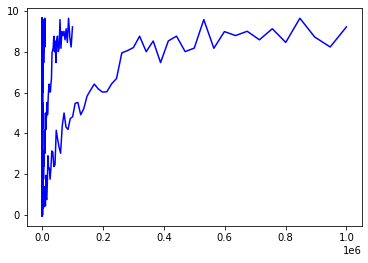

In [52]:
# predict y_hat using test_x and theta 
# plot x vs y in blue
plt.plot(x_poly_reg,data_y,'b')
# plot x vs y_hat in red


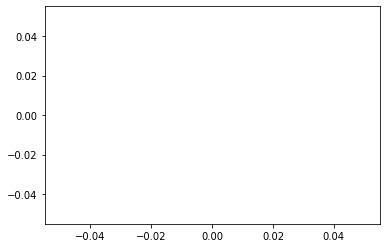

In [55]:
y_hat = x_poly_reg @ theta
plt.plot(x_poly_reg,y_hat,'r')